<a href="https://colab.research.google.com/github/Maorvg/Trumps-mean-tweets/blob/main/Trumps%20tweets%20with%20insults.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [298]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

Loading in trump insult csv


In [299]:
df=pd.read_csv('/trump_insult_tweets_2014_to_2021.csv')

The dataframe consists of multiple occurances of a tweet if it has more than one insult in it. I will group by the tweets to make them individual events, and add the insults in a list

In [300]:
df_grouped=(
    df
    .groupby('tweet')
    .agg({'insult':lambda x: list(x),
          'date':'first',
          'target':'first'})
    .reset_index()
)
df_grouped

,tweet,insult,date,target
0,"""@FiIibuster: @jeffzeleny Pathetic - you have ...",[bad reporter],2016-11-29,jeff-zeleny
1,"""@FoxNews: Julian Assange on U.S. media covera...",[More dishonest than anyone knows],2017-01-04,the-media
2,"""@JacoH: @CNN @realDonaldTrump I can't believe...","[bad reporters, only says negative]",2015-11-29,cnn
3,"""@JoeBowman12: @jeffzeleny just another generi...","[still doesn't get it, They will never learn!]",2016-11-29,cnn
4,"""@Robostop10: @realDonaldTrump This is not goo...",[many lies by Ben Carson],2015-11-06,ben-carson
...,...,...,...,...
5668,“We demand fairness” shouts Pelosi and the Do ...,[the most unfair witch-hunt in the history of ...,2020-01-13,impeachment-inquiry
5669,“What did Hunter Biden do for the money?” @Sen...,[Sleepy Joe],2019-11-07,joe-biden
5670,“What is happening to President Trump with Imp...,"[should be impeached for fraud, should be impe...",2019-10-16,adam-schiff
5671,“White House Confidence Grows As Hearings Wear...,[Do Nothing Democrats],2019-11-20,democrats


Confifuring for fututre functions

In [301]:
df_grouped["date"] = df_grouped["date"].astype("datetime64")
dates=df_grouped['date']
dates=dates.to_frame()

Plotting the distribution of 'targets' trump has in his tweets through several dictionaries which can later be traced.

<BarContainer object of 823 artists>

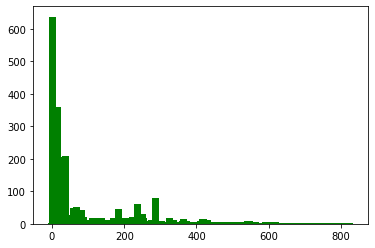

In [302]:
targets=df_grouped['target']

target_dic={}
indexer=0
for target in targets:

    try:
      target_dic[target][1]+=1
    except:
      target_dic[target]=[indexer,1]
      indexer+=1


target_indexer={}
for index in target_dic.values():
 target_indexer[index[0]]=index[1]

plt.bar(target_indexer.keys(), target_indexer.values(), width=20, color='g')



A pythonic solution to finding trumps favourite target

In [303]:
def max_finder(target_indexer,target_dic):
  max=0
  max_index=0
  for i in target_indexer:
    if target_indexer[i]>max:
      max=target_indexer[i]
      max_index=i
  
  for target in target_dic:
    if target_dic[target]==[max_index,max]:
      print (target)


max_finder(target_indexer,target_dic)
  

the-media


A more panda-ic solution to the same problem

In [304]:
df_grouped['target'].value_counts().index[0]


'the-media'

A function set to find the day Trump sent out the largest amount of insulting tweets

In [305]:
def meanest_day(dates):
  tweets=dates.value_counts()[0]
  date=dates.value_counts().index[0][0].date()
  print('Trumps meanest tweet day was ',date,' consisting of ',tweets, ' tweets')
  return date

x=meanest_day(dates)

Trumps meanest tweet day was  2020-10-12  consisting of  29  tweets


Plotting Trumps tweet volume over time

In [306]:
grouped_dates=dates.value_counts()
grouped_dates=grouped_dates.to_frame()
grouped_dates.sort_values(by=['date'],inplace=True)
grouped_dates.plot(figsize=(500, 101),color='r',kind='bar')
#

Finding the most commonly used words in trumps tweets


In [316]:
all_words=(df_grouped['tweet'].apply(lambda x: x.split()))
all_words_list=[]
for item in all_words:
  all_words_list+=item
all_words_list=[element.lower() for element in all_ords_list]
Counter(all_words_list).most_common(50)


[('the', 9411),
 ('to', 4214),
 ('and', 4105),
 ('a', 3400),
 ('is', 3331),
 ('of', 3253),
 ('in', 2449),
 ('for', 1846),
 ('that', 1764),
 ('i', 1739),
 ('they', 1573),
 ('are', 1511),
 ('on', 1487),
 ('&', 1258),
 ('he', 1188),
 ('be', 1179),
 ('it', 1173),
 ('have', 1153),
 ('with', 1124),
 ('will', 1120),
 ('was', 1108),
 ('fake', 983),
 ('not', 928),
 ('our', 909),
 ('by', 887),
 ('has', 808),
 ('so', 778),
 ('this', 776),
 ('we', 747),
 ('all', 744),
 ('no', 741),
 ('news', 732),
 ('just', 701),
 ('but', 690),
 ('very', 672),
 ('great', 654),
 ('at', 653),
 ('his', 649),
 ('who', 639),
 ('as', 627),
 ('do', 601),
 ('-', 591),
 ('people', 589),
 ('you', 549),
 ('never', 545),
 ('their', 539),
 ('now', 500),
 ('about', 498),
 ('even', 479),
 ('democrats', 477)]

After seeing one of the most commonly used words in trumps tweets is 'fake', I have decided to add a column of fixed tweets, replacing it with the word 'TRUE'

In [319]:
df_grouped['fixed_tweets']=None
df_grouped['fixed_tweets']=df_grouped['tweet']
df_grouped['fixed_tweets']=df_grouped['tweet'].apply(lambda x: x.replace('fake','TRUE'))
#for seeing results of fix:
#filt=['fake' in element for element in df_grouped['tweet']]
#df_grouped[filt]['fixed_tweets'].values


array(['.....and many others voted illegally. Also, machine “glitches” (another word for FRAUD), ballot harvesting, non-resident voters, TRUE ballots, “stuffing the ballot box”, votes for pay, roughed up Republican Poll Watchers, and sometimes even more votes than people voting, took....',
       '....TRUE signatures, illegal immigrant voters, banned Republican vote watchers, MORE VOTES THAN ACTUAL VOTERS (check out Detroit & Philadelphia), and much more. The numbers are far greater than what is necessary to win the individual swing states, and cannot even be contested....',
       "....it is very possible that those sources don't exsist but are made up by TRUE news writers. #FakeNews is the enemy!",
       '@elizabethforma Goofy Elizabeth Warren, sometimes referred to as Pocahontas because she TRUEd the fact she is native American, is a lowlife!',
       'Any negative polls are TRUE news, just like the CNN, ABC, NBC polls in the election. Sorry, people want border security and extreme